# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


## Generate Cities List

In [156]:
# Dependencies
import os
import csv
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from config import weather_api_key
from pprint import pprint

import scipy.stats as st
from scipy.stats import linregress
import numpy as np
#from scipy.stats import sem

In [157]:
# Set up limits to retrieve sample of cities from World Cities csv, by Latitude grouping
# Will be using World Cities listing from https://simplemaps.com/data/world-cities
# and my allocation of latitude groupings to spread the cities across the latitudes.

Latitude_Group_Numbers = [1,2,3,4,5,6,7,8]
Latitude_Group_Max_Cities = [68,118,77,78,88,129,71,11]
lat_g1_cnt=0
lat_g2_cnt=0
lat_g3_cnt=0
lat_g4_cnt=0
lat_g5_cnt=0
lat_g6_cnt=0
lat_g7_cnt=0
lat_g8_cnt=0
world_city_cnt=0
cnt=0

world_city_name = []
world_city_recno = []

# Open the CSV
# Set path for file
csvpath = os.path.join("Resources","worldcities.csv")
print(csvpath)
with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
    print(f"CSV Header: {csv_header}")

Resources\worldcities.csv
CSV Header: ['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3', 'admin_name', 'capital', 'population', 'id', 'Comb_Lat_Long', 'Longitude Group', 'latitude Group', 'pos-neg', 'Rand']


In [159]:
# Loop through looking for the Cities for their latitude grouping and store them up to their maximum allowed.
with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    csv_header = next(csvreader)
    csvreader = csv.reader(csvfile, delimiter=",")
#    print(f"CSV Header: {csv_header}")   
    cnt=0
    for row in csvreader:
        lat_group = int(row[11])
        if lat_group < 6 and (lat_g1_cnt < Latitude_Group_Max_Cities[0]):
            lat_g1_cnt +=1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g1_cnt} of Set 1")
        elif lat_group == 6 and (lat_g2_cnt < Latitude_Group_Max_Cities[1]):
            lat_g2_cnt +=1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g2_cnt} of Set 2")
        elif lat_group < 11 and (lat_g3_cnt < Latitude_Group_Max_Cities[2]):
            lat_g3_cnt +=1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g3_cnt} of Set 3")
        elif lat_group == 12 and (lat_g4_cnt < Latitude_Group_Max_Cities[3]):
            lat_g4_cnt +=1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g4_cnt} of Set 4")
        elif lat_group < 19 and (lat_g5_cnt < Latitude_Group_Max_Cities[4]):
            lat_g5_cnt = lat_g5_cnt + 1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g5_cnt} of Set 5")
        elif lat_group < 26 and (lat_g6_cnt < Latitude_Group_Max_Cities[5]):
            lat_g6_cnt +=1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g6_cnt} of Set 6")
        elif lat_group < 41 and (lat_g7_cnt < Latitude_Group_Max_Cities[6]):
            lat_g7_cnt +=1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g7_cnt} of Set 7")            
        elif lat_group < 65 and (lat_g8_cnt < Latitude_Group_Max_Cities[7]):
            lat_g8_cnt +=1
            world_city_name.append(row[1])
            world_city_recno.append(f"{lat_g8_cnt} of Set 8")   

print("Counts of Cities to be used by Latitude group: ",lat_g1_cnt," ",lat_g2_cnt," ",lat_g3_cnt," ",lat_g4_cnt," ",lat_g5_cnt," ",lat_g6_cnt," ",lat_g7_cnt," ",lat_g8_cnt)

Counts of Cities to be used by Latitude group:  68   118   77   78   88   129   71   11


In [160]:
#print(world_city_id[0])
print(len(world_city_name))
print(world_city_name[2])
print(world_city_recno[2])

640
Or `Aqiva
2 of Set 4


In [161]:
# Set up lists to store retrieved data from Open Weather
City_ID=[]
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
MaxTemp=[]
WindSpeed=[]


In [162]:
world_city_recno[1]
world_city_record_df = pd.DataFrame(world_city_name).join(pd.DataFrame(world_city_recno),lsuffix="left",rsuffix="right")
world_city_record_df

world_city_record_sorted_df = world_city_record_df.sort_values('0right')
world_city_record_sorted_df

,0left,0right
9,Museros,1 of Set 1
0,Bad Iburg,1 of Set 2
12,Sandnes,1 of Set 3
1,Bad Harzburg,1 of Set 4
4,Baleno,1 of Set 5
...,...,...
521,Temuco,97 of Set 6
499,Brixworth,98 of Set 2
530,Xindian,98 of Set 6
500,Romentino,99 of Set 2


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [163]:
# Setup the base query with the variable parameters - to use the By City ID Api
#  api.openweathermap.org/data/2.5/weather?id={city id}&appid={API key}
# query_url = (f"http://api.openweathermap.org/data/2.5/weather?id={world_city_id[i]}&appid={weather_api_key}&units={units}")

# Set units to Farenheit and miles per hour.
units = "imperial"  
city_cnt=0
for i in range(len(world_city_name)):
    query_url = (f"http://api.openweathermap.org/data/2.5/weather?q={world_city_name[i]}&appid={weather_api_key}&units={units}")
    city_response = requests.get(query_url).json()
    try:
        City_ID.append(city_response["id"])
        City.append(city_response["name"])
        Cloudiness.append(city_response["clouds"]["all"])
        Country.append(city_response["sys"]["country"])
        Date.append(city_response["dt"])
        Humidity.append(city_response["main"]["humidity"])
        Lat.append(city_response["coord"]["lat"])
        Lng.append(city_response["coord"]["lat"])
        MaxTemp.append(city_response["main"]["temp_max"])
        WindSpeed.append(city_response['wind']['speed'])
        city_cnt +=1
        print(f"Processing Record {world_city_recno[i]} | {world_city_name[i]}")
    except KeyError:
        print(f"City not found: {world_city_name[i]}")

print(f"Number of cities retrieved: {len(City)} ")

#pprint(city_response["id"])
#pprint(city_response["name"])
#pprint(city_response["clouds"]["all"])
#pprint(city_response["sys"]["country"])
#pprint(city_response["dt"])
#pprint(city_response["main"]["humidity"])
#pprint(city_response["coord"]["lat"])
#pprint(city_response["coord"]["lon"])
#pprint(city_response["main"]["temp_max"])
#print(f"{city_response['wind']['speed']} mph")

Processing Record 1 of Set 2 | Bad Iburg
Processing Record 1 of Set 4 | Bad Harzburg
City not found: Or `Aqiva
Processing Record 1 of Set 7 | St. Joseph
Processing Record 1 of Set 5 | Baleno
Processing Record 3 of Set 4 | Komatipoort
Processing Record 1 of Set 6 | St. Martin
Processing Record 2 of Set 2 | Hengoed
Processing Record 3 of Set 2 | Rio Formoso
Processing Record 1 of Set 1 | Museros
Processing Record 2 of Set 5 | Chapulhuacan
Processing Record 4 of Set 2 | Gundelsheim
Processing Record 1 of Set 3 | Sandnes
Processing Record 3 of Set 5 | Trinidad
Processing Record 4 of Set 5 | Asuncion
Processing Record 4 of Set 4 | Czeladz
Processing Record 1 of Set 8 | Sidney
Processing Record 2 of Set 6 | Round Lake Park
Processing Record 5 of Set 2 | Silsden
Processing Record 2 of Set 3 | Konce
Processing Record 2 of Set 7 | Oak Park
City not found: Colonia do Gurgueia
Processing Record 2 of Set 1 | Bacabal
Processing Record 7 of Set 2 | Glastonbury
Processing Record 3 of Set 7 | Carson C

Processing Record 46 of Set 2 | Villefontaine
Processing Record 33 of Set 6 | Rensselaer
Processing Record 30 of Set 5 | Gubat
Processing Record 30 of Set 4 | Bressanone
Processing Record 24 of Set 3 | Jutiapa
Processing Record 21 of Set 7 | Bogotol
Processing Record 31 of Set 4 | Ban Hua Saphan
City not found: Alcantaras
Processing Record 22 of Set 7 | Cold Springs
Processing Record 47 of Set 2 | Zaandam
Processing Record 31 of Set 5 | Candiota
Processing Record 48 of Set 2 | Mitcham
Processing Record 25 of Set 3 | Strazhitsa
Processing Record 34 of Set 6 | Lehighton
Processing Record 49 of Set 2 | Lagoa do Carro
Processing Record 32 of Set 4 | Umm Qasr
Processing Record 33 of Set 4 | Ergoldsbach
Processing Record 26 of Set 3 | Janauba
City not found: Sidi Yahia Sawad
Processing Record 32 of Set 5 | San Fernando
Processing Record 22 of Set 1 | Pedro Munoz
Processing Record 8 of Set 8 | Shuangyashan
Processing Record 23 of Set 7 | Northfield
Processing Record 27 of Set 3 | Farsund
Proc

Processing Record 56 of Set 4 | Nagykovacsi
Processing Record 46 of Set 7 | Sanming
Processing Record 57 of Set 4 | Trebic
Processing Record 74 of Set 6 | Blooming Grove
Processing Record 75 of Set 6 | Manteo
Processing Record 76 of Set 6 | Richmond Heights
Processing Record 50 of Set 3 | Jordania
Processing Record 56 of Set 5 | Panchgani
Processing Record 51 of Set 3 | Rio Espera
Processing Record 57 of Set 5 | Gingoog
Processing Record 58 of Set 5 | Uchkeken
City not found: Ban Pa Lu Ru
Processing Record 82 of Set 2 | Werkendam
City not found: Imoulas
Processing Record 59 of Set 4 | Bom Sucesso
Processing Record 52 of Set 3 | Betim
Processing Record 47 of Set 7 | Maplewood
Processing Record 83 of Set 2 | Chickerell
Processing Record 40 of Set 1 | Felanitx
City not found: Guarai
Processing Record 41 of Set 1 | Villarejo de Salvanes
Processing Record 53 of Set 3 | Bellshill
Processing Record 77 of Set 6 | Swampscott
Processing Record 85 of Set 2 | Calusco d'Adda
Processing Record 78 of

Processing Record 70 of Set 7 | Marshall
Processing Record 84 of Set 5 | Rancheria Payau
Processing Record 119 of Set 6 | Truth or Consequences
Processing Record 120 of Set 6 | General Fernandez Oro
Processing Record 121 of Set 6 | Willow Springs
Processing Record 71 of Set 7 | Tehachapi
Processing Record 76 of Set 3 | Gabrovo
Processing Record 77 of Set 3 | Carangola
Processing Record 85 of Set 5 | Kuala Belait
Processing Record 122 of Set 6 | Centereach
Processing Record 71 of Set 4 | Burgebrach
Processing Record 72 of Set 4 | Gdynia
Processing Record 86 of Set 5 | Malangas
Processing Record 123 of Set 6 | Hartford
Processing Record 87 of Set 5 | Altavilla Silentina
Processing Record 124 of Set 6 | Amity
Processing Record 88 of Set 5 | Can-Avid
Processing Record 125 of Set 6 | Myrhorod
Processing Record 126 of Set 6 | Guagua
Processing Record 127 of Set 6 | Shipley
Processing Record 62 of Set 1 | Aizoain
City not found: Igarape-Miri
Processing Record 128 of Set 6 | Hammond
Processing

In [164]:
print(f"Number of cities retrieved: {len(City)} ")

Number of cities retrieved: 583 


In [165]:
pprint(city_response["id"])
pprint(city_response["name"])
pprint(city_response["clouds"]["all"])
pprint(city_response["sys"]["country"])
pprint(city_response["dt"])
pprint(city_response["main"]["humidity"])
pprint(city_response["coord"]["lat"])
pprint(city_response["coord"]["lon"])
pprint(city_response["main"]["temp_max"])
print(f"{city_response['wind']['speed']} mph")

print(f"{city_response['main']['temp']} farenheit")
print(f"{city_response['wind']['speed']} mph")

6318165
'Rio Preto da Eva'
59
'BR'
1631419083
85
-2.6994
-59.6997
80.98
2.71 mph
75.6 farenheit
2.71 mph


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [166]:
#output_data = zip()
#output_data =zip(City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed)
#new_output_data =zip(City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed)
#output_data_list = list(output_data)
#print(len(City_ID))

In [168]:
#output_data = zip()
output_data =zip(City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed)
output_data_list = list(output_data)
output_file = os.path.join("output_data","cities.csv")
# open the output file, create a header row, and then write the zipped object to the csv
with open(output_file, "w", newline='',encoding='utf-8') as datafile:
    writer = csv.writer(datafile)
    writer.writerow(["City_ID","City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
    writer.writerows(output_data_list)
output_data_df = pd.DataFrame(output_data_list, columns=("City_ID","City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"))
output_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2953430,Bad Iburg,99,DE,1631418191,92,52.1549,52.1549,63.52,7.11
1,2953449,Bad Harzburg,99,DE,1631418436,94,51.8833,51.8833,61.65,5.30
2,4407010,Saint Joseph,1,US,1631418438,64,39.7686,39.7686,82.26,9.22
3,1728272,Baleno,100,PH,1631418439,72,12.4739,12.4739,85.06,6.64
4,988290,Komatipoort,0,ZA,1631418439,81,-25.4332,-25.4332,57.45,4.18
...,...,...,...,...,...,...,...,...,...,...
578,714772,Tiszafüred,0,HU,1631419079,52,47.6167,47.6167,53.58,4.07
579,7026886,Sai Mai,20,TH,1631418804,72,13.9207,13.9207,87.98,13.80
580,2268339,Faro,0,PT,1631419081,94,37.0194,37.0194,65.98,2.30
581,700646,Velyki Luchky,96,UA,1631419082,68,48.4188,48.4188,55.36,2.75


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [169]:
cities_humidity_greater_than_100 = output_data_df.loc[(output_data_df["Humidity"] > 100)]
cities_humidity_greater_than_100
# Note none of the cities were > 100%.  Some were 100% maximum.

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [170]:
#  Get the indices of cities that have humidity over 100%.


In [171]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [172]:
 output_data_df["Lat"].describe()

count    583.000000
mean      31.686814
std       23.516792
min      -51.723600
25%       21.151150
50%       40.776500
75%       47.671400
max       64.563500
Name: Lat, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

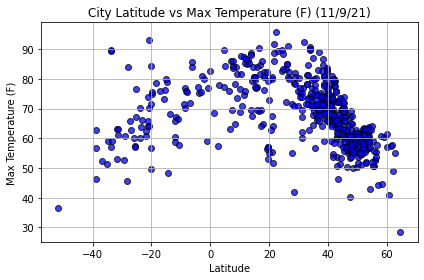

In [173]:
# Generate a scatter plot of Latitude vs Max Temperature (F)
y_axis = output_data_df["Max Temp"]
x_axis = output_data_df["Lat"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.title("City Latitude vs Max Temperature (F) (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.tight_layout()

#plt.xlim(min(x_axis)-5,max(x_axis)+5)
#plt.ylim(min(y_axis)-5,max(y_axis)+5)
plt.savefig("./output_data/Latitude_vs_temp.png")

In [174]:
print(x_axis)

0      52.1549
1      51.8833
2      39.7686
3      12.4739
4     -25.4332
        ...   
578    47.6167
579    13.9207
580    37.0194
581    48.4188
582    -2.6994
Name: Lat, Length: 583, dtype: float64


## Latitude vs. Humidity Plot

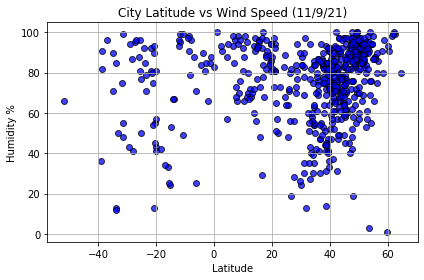

In [175]:
# Generate a scatter plot of Latitude vs Humidity %

plt.title("City Latitude vs Wind Speed (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
y_axis = output_data_df["Humidity"]
x_axis = output_data_df["Lat"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
           alpha=0.75)
plt.grid(True)
plt.tight_layout()
plt.savefig("./output_data/Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

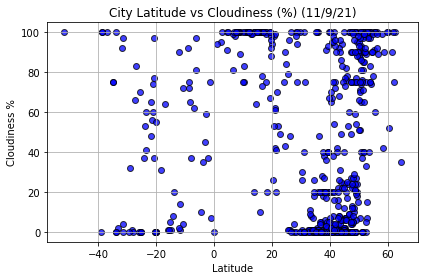

In [176]:
# Generate a scatter plot of Latitude vs Humidity

plt.title("City Latitude vs Cloudiness (%) (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
y_axis = output_data_df["Cloudiness"]
x_axis = output_data_df["Lat"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
           alpha=0.75)
plt.grid(True)
plt.tight_layout()
plt.savefig("./output_data/Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

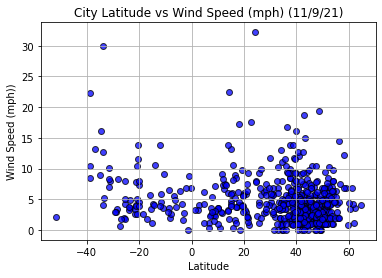

In [177]:
# Generate a scatter plot of Latitude vs Wind Speed

plt.title("City Latitude vs Wind Speed (mph) (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
y_axis = output_data_df["Wind Speed"]
x_axis = output_data_df["Lat"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.grid(True)

plt.savefig("./output_data/Latitude_vs_windspeed.png")

## Linear Regression

In [178]:
# Create Southern and Northern hemisphere data sets
southern_output_data_df = output_data_df.loc[(output_data_df["Lat"] < 0)]
northern_output_data_df = output_data_df.loc[(output_data_df["Lat"] >= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4311926336330858


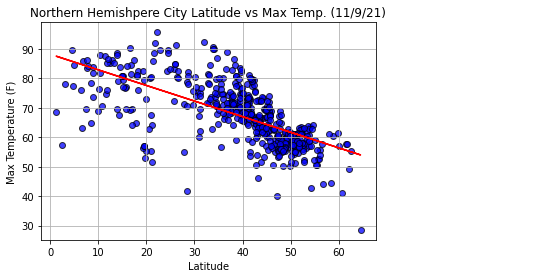

In [179]:
# Generate a scatter plot of Latitude vs Max Temperature

plt.title("Northern Hemishpere City Latitude vs Max Temp. (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
y_axis = northern_output_data_df["Max Temp"]
x_axis = northern_output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(70,65),fontsize=15,color="red")
plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [180]:
southern_output_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,988290,Komatipoort,0,ZA,1631418439,81,-25.4332,-25.4332,57.45,4.18
7,3390295,Rio Formoso,75,BR,1631418443,91,-8.6636,-8.6636,76.96,6.55
12,3902377,La Santisima Trinidad,1,BO,1631418450,53,-14.8333,-14.8333,79.11,4.18
13,3439389,Asunción,0,PY,1631418390,50,-25.3007,-25.3007,76.44,8.05
15,2147714,Sydney,0,AU,1631418370,13,-33.8679,-33.8679,89.35,4.00
...,...,...,...,...,...,...,...,...,...,...
543,932505,Maseru,0,LS,1631419046,43,-29.3167,-29.3167,52.74,3.00
545,1627549,Serang,97,ID,1631419044,71,-6.1149,-6.1149,85.77,3.80
553,3855114,General Fernández Oro,0,AR,1631419054,36,-38.9530,-38.9530,62.74,10.36
557,3467012,Carangola,97,BR,1631419057,90,-20.7331,-20.7331,70.36,2.59


The r-squared is: 0.25337878658984525


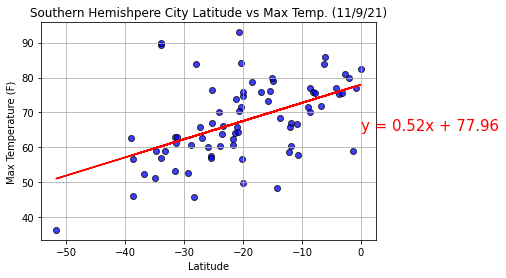

In [181]:
# Generate a scatter plot of Latitude vs Max Temperature

plt.title("Southern Hemishpere City Latitude vs Max Temp. (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
y_axis = southern_output_data_df["Max Temp"]
x_axis = southern_output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(0,65),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01927670239218568


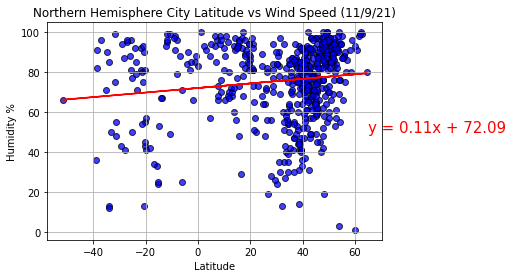

In [182]:
# Generate a scatter plot of Latitude vs Humidity %

plt.title("Northern Hemisphere City Latitude vs Wind Speed (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
y_axis = output_data_df["Humidity"]
x_axis = output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(65,50),fontsize=15,color="red")
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01927670239218568


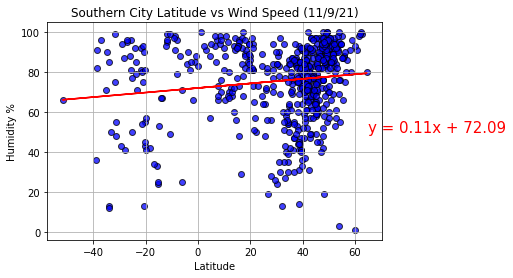

In [183]:
# Generate a scatter plot of Latitude vs Humidity %

plt.title("Southern City Latitude vs Wind Speed (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
y_axis = output_data_df["Humidity"]
x_axis = output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(65,50),fontsize=15,color="red")
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0019134974935172404


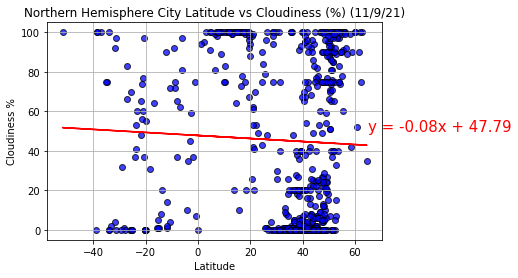

In [184]:
# Generate a scatter plot of Latitude vs Humidity

plt.title("Northern Hemisphere City Latitude vs Cloudiness (%) (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
y_axis = output_data_df["Cloudiness"]
x_axis = output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(65,50),fontsize=15,color="red")
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0019134974935172404


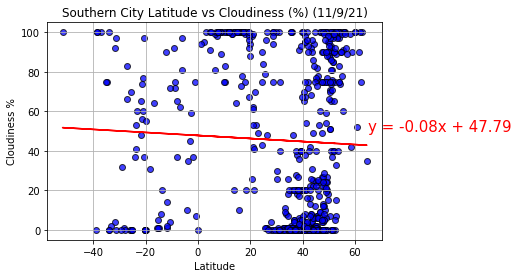

In [185]:
# Generate a scatter plot of Latitude vs Humidity

plt.title("Southern City Latitude vs Cloudiness (%) (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
y_axis = output_data_df["Cloudiness"]
x_axis = output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.annotate(line_eq,(65,50),fontsize=15,color="red")
plt.grid(True)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.039622002479643065


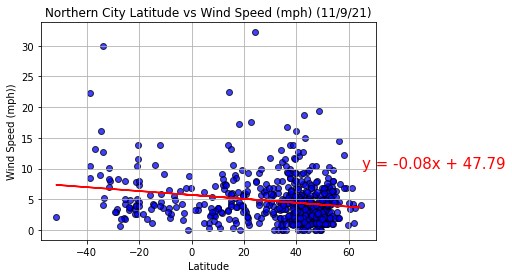

In [186]:
# Generate a scatter plot of Latitude vs Wind Speed

plt.title("Northern City Latitude vs Wind Speed (mph) (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
y_axis = output_data_df["Wind Speed"]
x_axis = output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.annotate(line_eq,(65,10),fontsize=15,color="red")
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.039622002479643065


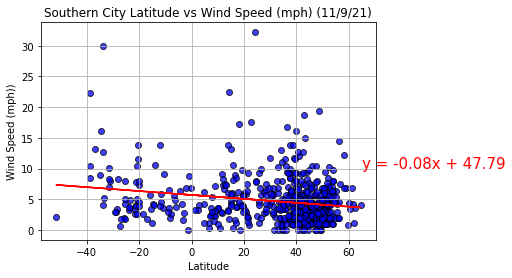

In [187]:
# Generate a scatter plot of Latitude vs Wind Speed

plt.title("Southern City Latitude vs Wind Speed (mph) (11/9/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
y_axis = output_data_df["Wind Speed"]
x_axis = output_data_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.annotate(line_eq,(65,10),fontsize=15,color="red")
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75);
plt.plot(x_axis,regress_values,"r-");
print(f"The r-squared is: {rvalue**2}")